# Lab-3 Assignment: Neural Network


---
**Submitted By:** Abhaya Shrestha \
**Roll No.:** ACE079BCT005

---

## Objective
Using the provided dataset `circles_binary_classification.csv` , we will reproduce and extend the workflow. The main objective of this lab is to build, train, evaluate and compare PyTorch ANNs to classify the circular data and report findings.

## Theory
### **Neural Network**
Neural networks are machine learning models that mimic the complex functions of the human brain. These models consist of interconnected nodes or neurons that process data, learn patterns and enable tasks such as pattern recognition and decision-making.

Neural networks are capable of learning and identifying patterns directly from data without pre-defined rules. These networks are built from several key components:
- **Neurons:** The basic units that receive inputs, each neuron is governed by a threshold and an activation function.
- **Connections:** Links between neurons that carry information, regulated by weights and biases.
- **Weights and Biases:** These parameters determine the strength and influence of connections.
- **Propagation Functions:** Mechanisms that help process and transfer data across layers of neurons.
- **Learning Rule:** The method that adjusts weights and biases over time to improve accuracy.

### **Layers in Neural Network Architecture**
1. **Input Layer:** This is where the network receives its input data. Each input neuron in the layer corresponds to a feature in the input data.
2. **Hidden Layers:** These layers perform most of the computational heavy lifting. A neural network can have one or multiple hidden layers. Each layer consists of units (neurons) that transform the inputs into something that the output layer can use.
3. **Output Layer:** The final layer produces the output of the model. The format of these outputs varies depending on the specific task like classification, regression.

## Tasks

### Data Retreival and Collection



In [1]:
import pandas as pd

data = pd.read_csv('circles_binary_classification.csv')
data.head(6)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1


### Data Cleaning & Feature Design

In [2]:
data.describe()

,X1,X2,label
count,1000.000000,1000.000000,1000.00000
mean,-0.000448,-0.000804,0.50000
std,0.639837,0.641156,0.50025
min,-1.059502,-1.067768,0.00000
25%,-0.619251,-0.612176,0.00000
50%,0.008762,-0.003949,0.50000
75%,0.621933,0.624822,1.00000
max,1.033712,1.036004,1.00000


In [3]:
# vectorizing X1 and X2 into a single tensor/nparray

X = data[['X1', 'X2']].values
y = data['label'].values

In [4]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [5]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
import torch

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
y = y.unsqueeze(1)

# View the first five samples
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([[1.],
         [1.],
         [1.],
         [1.],
         [0.]]))

### Data Visualization

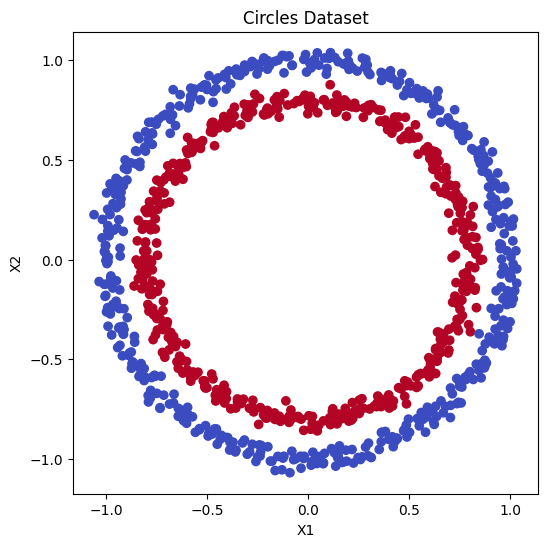

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y.squeeze(), cmap='coolwarm')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Circles Dataset')
plt.show()

### Train/Test Split

In [8]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

### Device Configuration

In [9]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### Model Implementation

#### ***Model 0***

In [10]:
# 1. Construct a model class that subclasses nn.Module
class ModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)
    
    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = ModelV0().to(device)
model_0

ModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [11]:
model = model_0

In [12]:
# Make predictions with the model
untrained_preds = model(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 1])

First 10 predictions:
tensor([[-0.0175],
        [ 0.1085],
        [-0.2457],
        [ 0.0468],
        [-0.0837],
        [-0.0081],
        [ 0.2183],
        [ 0.1914],
        [-0.2522],
        [ 0.1187]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.]])


### Loss Function Selection

In [13]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model.parameters(), 
                            lr=0.1)

In [14]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [15]:
# View the frist 5 outputs of the forward pass on the test data
y_logits = model(X_test.to(device))[:5]
y_logits

tensor([[-0.0175],
        [ 0.1085],
        [-0.2457],
        [ 0.0468],
        [-0.0837]], grad_fn=<SliceBackward0>)

In [16]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4956],
        [0.5271],
        [0.4389],
        [0.5117],
        [0.4791]], grad_fn=<SigmoidBackward0>)

In [17]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 1., 0., 1., 0.], grad_fn=<SqueezeBackward0>)

In [18]:
y_test[:5]

tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.]])

### Model Learning

In [19]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device) 

# Ensure targets have shape (N, 1) to match model outputs
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

def train_and_test_loop(
    model: nn.Module,
    epochs: int,
    X_train: torch.Tensor,
    y_train: torch.Tensor,
    X_test: torch.Tensor,
    y_test: torch.Tensor,
    loss_fn: nn.Module,
    optimizer: torch.optim.Optimizer
):
    # lists
    loss_list = []
    acc_list = []
    test_losses = []
    test_acc_list = []



    # Build training and evaluation loop
    for epoch in range(epochs):
        ### Training
        model.train()

        # 1. Forward pass (model outputs raw logits)
        y_logits = model(X_train) # keep shape (N,1) so it matches `y_train`
        y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
    
        # 2. Calculate loss/accuracy
        # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
        #                y_train) 
        loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                    y_train) 
        acc = accuracy_fn(y_true=y_train, 
                        y_pred=y_pred) 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backwards
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        ### Testing
        model.eval()
        with torch.inference_mode():
            # 1. Forward pass
            test_logits = model(X_test) 
            test_pred = torch.round(torch.sigmoid(test_logits))
            # 2. Caculate loss/accuracy
            test_loss = loss_fn(test_logits,
                                y_test)
            test_acc = accuracy_fn(y_true=y_test,
                                y_pred=test_pred)


        loss_list.append(loss.item())
        acc_list.append(acc)
        test_losses.append(test_loss.item())
        test_acc_list.append(test_acc)

        # Print out what's happening every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

    return loss_list, acc_list, test_losses, test_acc_list

### Model Evaluation

In [20]:
train_losses, acc_list, test_losses, test_acc = train_and_test_loop(
    model=model,
    epochs=epochs,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    loss_fn=loss_fn,
    optimizer=optimizer
)

Epoch: 0 | Loss: 0.69563, Accuracy: 50.00% | Test loss: 0.70248, Test acc: 47.00%
Epoch: 10 | Loss: 0.69500, Accuracy: 50.25% | Test loss: 0.70147, Test acc: 48.00%
Epoch: 20 | Loss: 0.69462, Accuracy: 50.50% | Test loss: 0.70072, Test acc: 47.50%
Epoch: 30 | Loss: 0.69435, Accuracy: 50.88% | Test loss: 0.70010, Test acc: 47.50%
Epoch: 40 | Loss: 0.69413, Accuracy: 50.75% | Test loss: 0.69957, Test acc: 47.50%
Epoch: 50 | Loss: 0.69396, Accuracy: 50.62% | Test loss: 0.69911, Test acc: 47.50%
Epoch: 60 | Loss: 0.69381, Accuracy: 50.88% | Test loss: 0.69870, Test acc: 47.00%
Epoch: 70 | Loss: 0.69369, Accuracy: 51.00% | Test loss: 0.69834, Test acc: 47.00%
Epoch: 80 | Loss: 0.69358, Accuracy: 50.88% | Test loss: 0.69801, Test acc: 47.50%
Epoch: 90 | Loss: 0.69350, Accuracy: 51.00% | Test loss: 0.69772, Test acc: 47.00%


In [21]:
import numpy as np
import torch
import matplotlib.pyplot as plt


def plot_decision_boundary(model, X, y, device=None, cmap='coolwarm'):
    
    model_device = next(model.parameters()).device if any(p.requires_grad for p in model.parameters()) else torch.device('cpu')
    use_device = torch.device(device) if device is not None else model_device

    # Convert inputs to numpy
    if isinstance(X, torch.Tensor):
        X_np = X.detach().cpu().numpy()
    else:
        X_np = np.asarray(X)

    if isinstance(y, torch.Tensor):
        y_np = y.detach().cpu().squeeze().numpy()
    else:
        y_np = np.asarray(y).squeeze()

    x_min, x_max = X_np[:, 0].min() - 0.1, X_np[:, 0].max() + 0.1
    y_min, y_max = X_np[:, 1].min() - 0.1, X_np[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Run model predictions on CPU for plotting
    model_cpu = model.to('cpu')
    model_cpu.eval()

    grid_t = torch.tensor(grid, dtype=torch.float32)
    with torch.inference_mode():
        logits = model_cpu(grid_t).squeeze()
        probs = torch.sigmoid(logits).numpy()

    Z = (probs > 0.5).astype(int).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    plt.scatter(X_np[:, 0], X_np[:, 1], c=y_np, s=20, cmap=cmap, edgecolor='k')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)



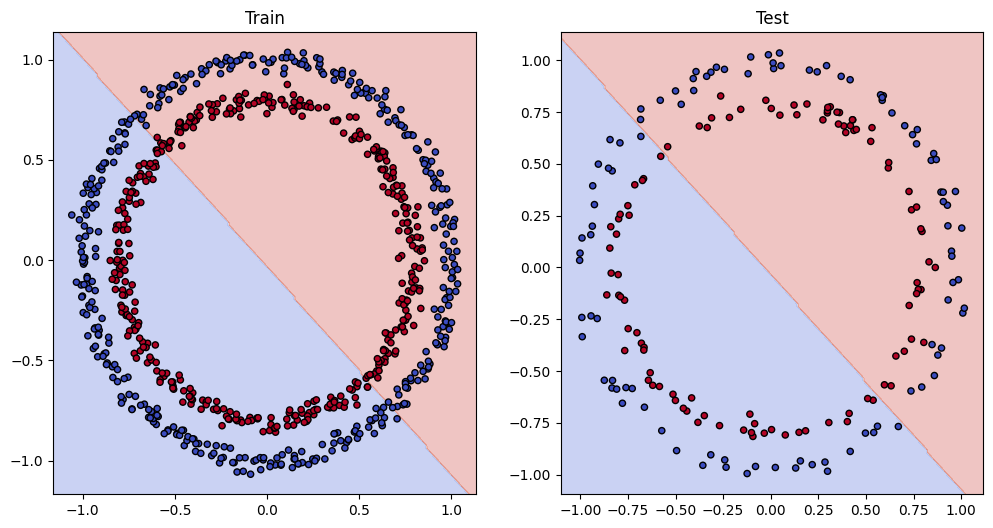

In [22]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

In machine learning terms, our model is `underfitting`, meaning it's not learning predictive patterns from the data.

Let's also plot the loss graph: 


In [23]:
import matplotlib.pyplot as plt

def plot_loss_curves(train_losses, test_losses):
    
    epochs = range(len(train_losses))

    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_losses, label="Training Loss")
    plt.plot(epochs, test_losses, label="Test Loss")
    
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training and Test Loss Curves")
    plt.legend()
    plt.grid(True)
    plt.show()


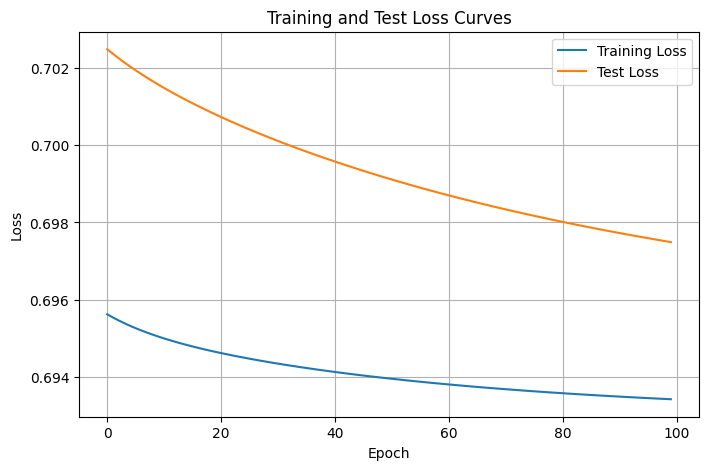

In [24]:
plot_loss_curves(train_losses, test_losses)


### Improving the Model

To increase the model’s learning capacity, we’ll make the following changes:

- Add an extra hidden layer  
- Increase the number of hidden units from **5 → 15**   
- Train for longer, increasing epochs from **100 → 1000**

We’ll follow the same modeling steps as before, but with these updated hyperparameters, and then evaluate whether these changes help reduce underfitting and improve performance.


#### ***Model 1***

In [25]:
class ModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=15)
        self.layer_2 = nn.Linear(in_features=15, out_features=15)
        self.layer_3 = nn.Linear(in_features=15, out_features=1)
        
    def forward(self, x): 
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = ModelV1().to(device)
model_1

ModelV1(
  (layer_1): Linear(in_features=2, out_features=15, bias=True)
  (layer_2): Linear(in_features=15, out_features=15, bias=True)
  (layer_3): Linear(in_features=15, out_features=1, bias=True)
)

In [26]:
model = model_1
epochs = 1000

# Create a loss function
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model.parameters(), 
                            lr=0.1)

Epoch: 0 | Loss: 0.69588, Accuracy: 50.00% | Test loss: 0.69540, Test acc: 50.00%
Epoch: 10 | Loss: 0.69357, Accuracy: 50.00% | Test loss: 0.69407, Test acc: 50.00%
Epoch: 20 | Loss: 0.69313, Accuracy: 55.38% | Test loss: 0.69402, Test acc: 51.50%
Epoch: 30 | Loss: 0.69304, Accuracy: 52.00% | Test loss: 0.69413, Test acc: 49.00%
Epoch: 40 | Loss: 0.69301, Accuracy: 51.38% | Test loss: 0.69424, Test acc: 48.00%
Epoch: 50 | Loss: 0.69300, Accuracy: 51.12% | Test loss: 0.69432, Test acc: 47.00%
Epoch: 60 | Loss: 0.69299, Accuracy: 50.88% | Test loss: 0.69439, Test acc: 47.00%
Epoch: 70 | Loss: 0.69299, Accuracy: 51.00% | Test loss: 0.69444, Test acc: 47.00%
Epoch: 80 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69449, Test acc: 47.00%
Epoch: 90 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69452, Test acc: 47.00%
Epoch: 100 | Loss: 0.69298, Accuracy: 51.25% | Test loss: 0.69455, Test acc: 46.50%
Epoch: 110 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69458, Test acc: 46.50%
Epo

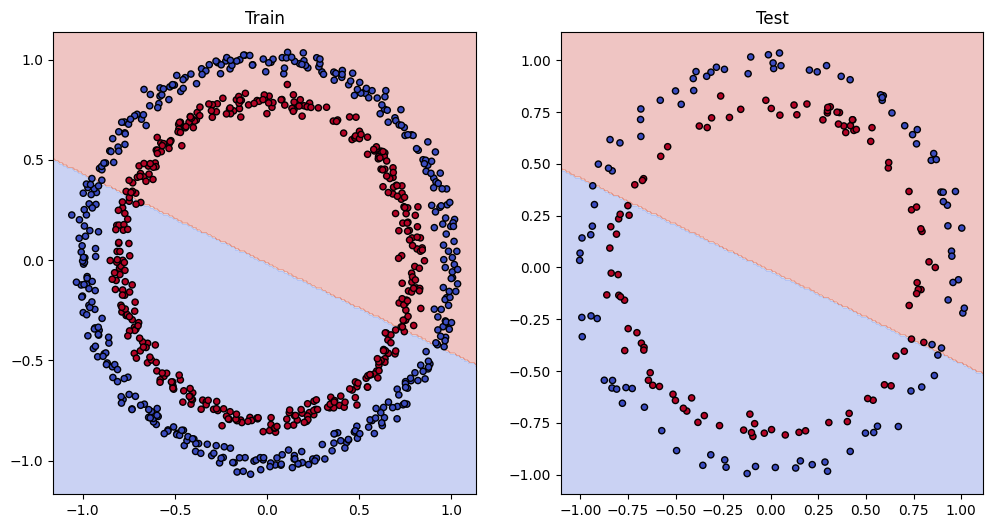

In [27]:
train_losses, acc_list, test_losses, test_acc = train_and_test_loop(
    model=model,
    epochs=epochs,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    loss_fn=loss_fn,
    optimizer=optimizer
)

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

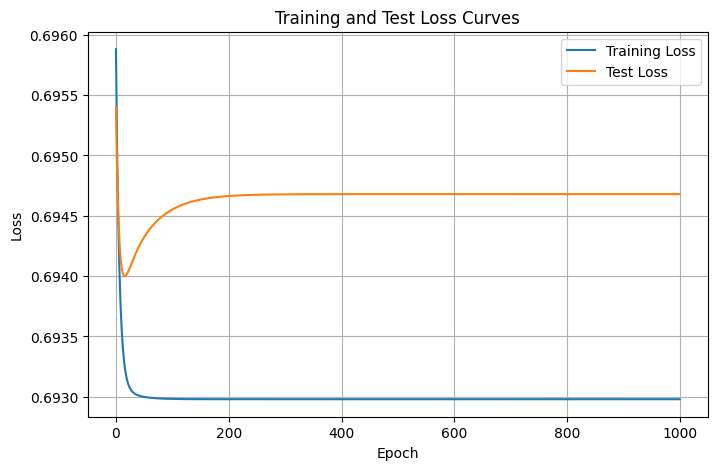

In [28]:
plot_loss_curves(train_losses, test_losses)

**Let's try adding activation functions:**

#### ***Model 2***

In [29]:
# Build model with non-linear activation function
from torch import nn
class ModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=64)
        self.layer_2 = nn.Linear(in_features=64, out_features=64)
        self.layer_3 = nn.Linear(in_features=64, out_features=10)
        self.layer_4=nn.Linear(in_features=10,out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model 
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))

model_2 = ModelV2().to(device)
print(model_2)

ModelV2(
  (layer_1): Linear(in_features=2, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_3): Linear(in_features=64, out_features=10, bias=True)
  (layer_4): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


Epoch: 0 | Loss: 0.69299, Accuracy: 47.75% | Test loss: 0.69297, Test acc: 47.00%
Epoch: 10 | Loss: 0.69273, Accuracy: 49.62% | Test loss: 0.69280, Test acc: 44.50%
Epoch: 20 | Loss: 0.69247, Accuracy: 52.25% | Test loss: 0.69263, Test acc: 48.50%
Epoch: 30 | Loss: 0.69222, Accuracy: 56.38% | Test loss: 0.69246, Test acc: 56.50%
Epoch: 40 | Loss: 0.69198, Accuracy: 61.38% | Test loss: 0.69230, Test acc: 60.00%
Epoch: 50 | Loss: 0.69173, Accuracy: 63.50% | Test loss: 0.69214, Test acc: 61.50%
Epoch: 60 | Loss: 0.69147, Accuracy: 63.75% | Test loss: 0.69198, Test acc: 62.00%
Epoch: 70 | Loss: 0.69119, Accuracy: 64.25% | Test loss: 0.69179, Test acc: 62.00%
Epoch: 80 | Loss: 0.69089, Accuracy: 64.38% | Test loss: 0.69159, Test acc: 62.00%
Epoch: 90 | Loss: 0.69057, Accuracy: 65.50% | Test loss: 0.69136, Test acc: 63.00%


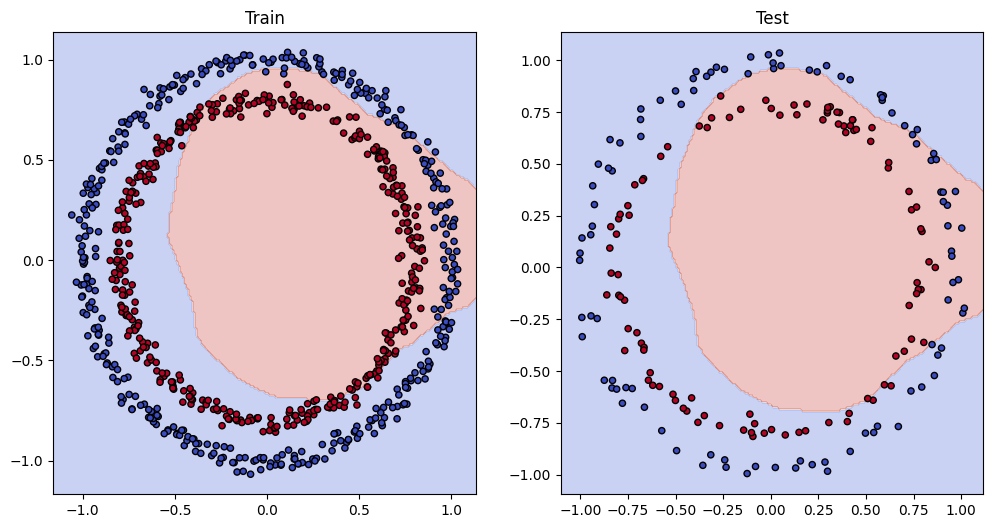

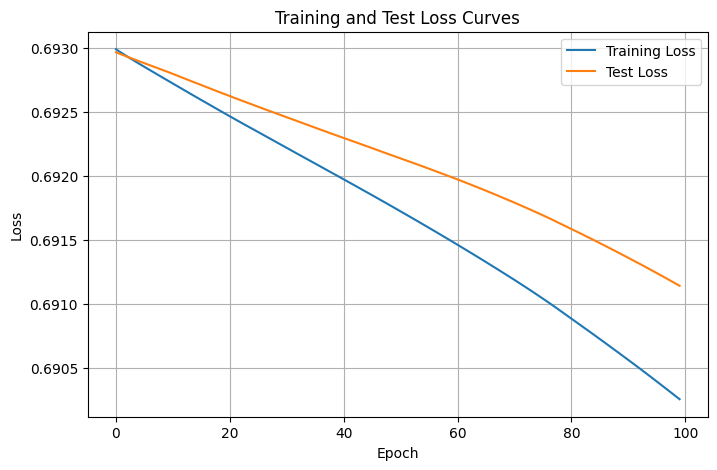

In [30]:
model = model_2
epochs = 100

# Create a loss function
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model.parameters(), 
                            lr=0.1)

train_losses, acc_list, test_losses, test_acc = train_and_test_loop(
    model=model,
    epochs=epochs,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    loss_fn=loss_fn,
    optimizer=optimizer
)

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)
plot_loss_curves(train_losses, test_losses)

Now, we train the model again but with a higher epochs i.e. train for a longer time.


Epoch: 0 | Loss: 0.70581, Accuracy: 50.00% | Test loss: 0.70432, Test acc: 50.00%
Epoch: 10 | Loss: 0.70012, Accuracy: 50.00% | Test loss: 0.69923, Test acc: 50.00%
Epoch: 20 | Loss: 0.69718, Accuracy: 50.00% | Test loss: 0.69663, Test acc: 50.00%
Epoch: 30 | Loss: 0.69549, Accuracy: 50.00% | Test loss: 0.69509, Test acc: 50.00%
Epoch: 40 | Loss: 0.69450, Accuracy: 50.00% | Test loss: 0.69421, Test acc: 50.00%
Epoch: 50 | Loss: 0.69386, Accuracy: 50.00% | Test loss: 0.69364, Test acc: 50.00%
Epoch: 60 | Loss: 0.69346, Accuracy: 50.00% | Test loss: 0.69332, Test acc: 50.00%
Epoch: 70 | Loss: 0.69321, Accuracy: 50.00% | Test loss: 0.69312, Test acc: 50.00%
Epoch: 80 | Loss: 0.69305, Accuracy: 50.00% | Test loss: 0.69298, Test acc: 50.00%
Epoch: 90 | Loss: 0.69294, Accuracy: 50.00% | Test loss: 0.69289, Test acc: 50.00%
Epoch: 100 | Loss: 0.69286, Accuracy: 50.00% | Test loss: 0.69281, Test acc: 50.00%
Epoch: 110 | Loss: 0.69280, Accuracy: 51.00% | Test loss: 0.69275, Test acc: 51.50%
Epo

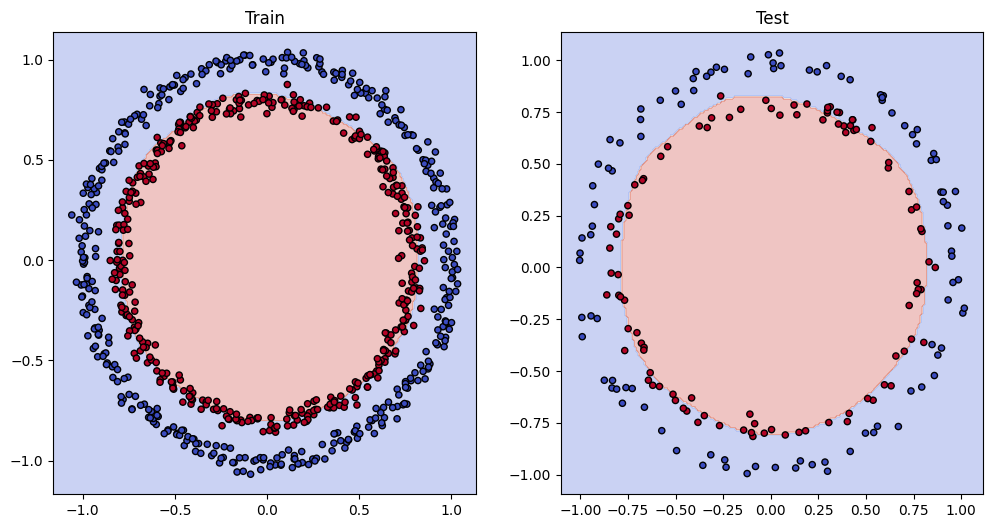

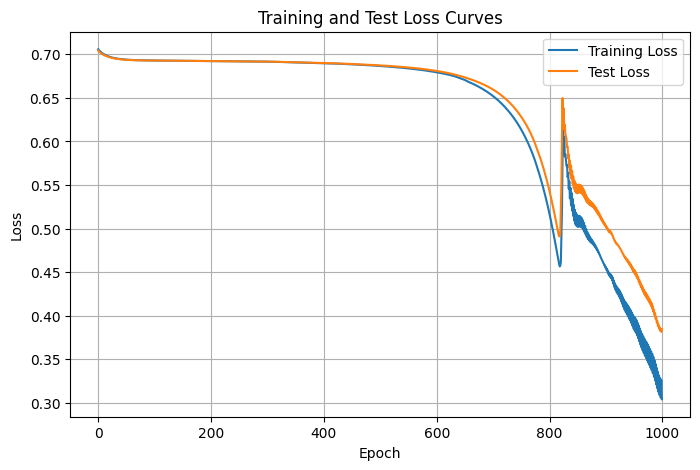

In [31]:
epochs = 1000
model = ModelV2().to(device) # reset model
optimizer = torch.optim.SGD(params=model.parameters(), 
                            lr=0.1)

train_losses, acc_list, test_losses, test_acc = train_and_test_loop(
    model=model,
    epochs=epochs,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    loss_fn=loss_fn,
    optimizer=optimizer
)

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)
plot_loss_curves(train_losses, test_losses)

Epoch: 0 | Loss: 0.69662, Accuracy: 50.00% | Test loss: 0.69565, Test acc: 50.00%
Epoch: 10 | Loss: 0.69422, Accuracy: 50.00% | Test loss: 0.69378, Test acc: 50.00%
Epoch: 20 | Loss: 0.69299, Accuracy: 50.00% | Test loss: 0.69290, Test acc: 50.00%
Epoch: 30 | Loss: 0.69213, Accuracy: 66.62% | Test loss: 0.69229, Test acc: 67.00%
Epoch: 40 | Loss: 0.69141, Accuracy: 52.75% | Test loss: 0.69184, Test acc: 50.00%
Epoch: 50 | Loss: 0.69069, Accuracy: 53.50% | Test loss: 0.69131, Test acc: 48.50%
Epoch: 60 | Loss: 0.69016, Accuracy: 53.50% | Test loss: 0.69096, Test acc: 51.50%
Epoch: 70 | Loss: 0.68968, Accuracy: 54.00% | Test loss: 0.69065, Test acc: 52.00%
Epoch: 80 | Loss: 0.68922, Accuracy: 56.12% | Test loss: 0.69032, Test acc: 54.50%
Epoch: 90 | Loss: 0.68874, Accuracy: 58.00% | Test loss: 0.68996, Test acc: 55.00%
Epoch: 100 | Loss: 0.68815, Accuracy: 62.75% | Test loss: 0.68949, Test acc: 58.00%
Epoch: 110 | Loss: 0.68755, Accuracy: 67.25% | Test loss: 0.68912, Test acc: 60.00%
Epo

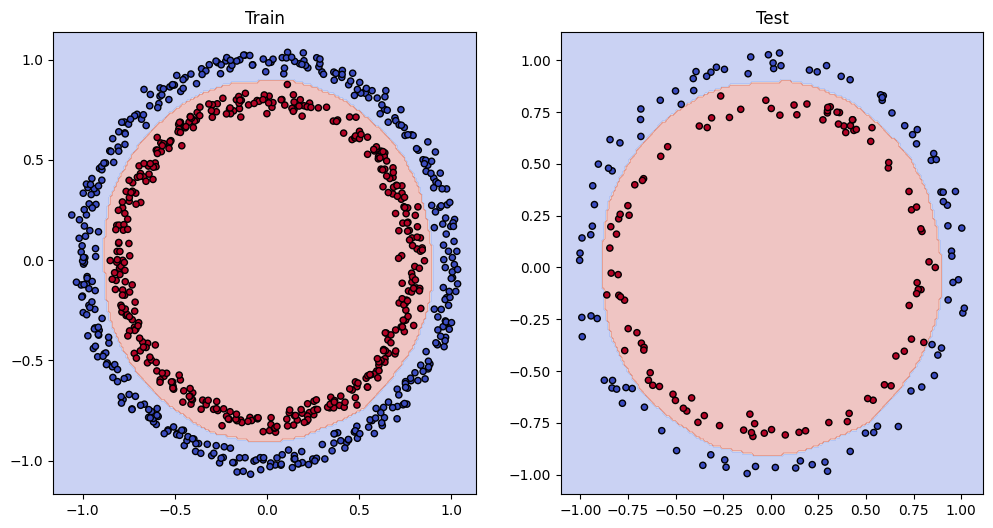

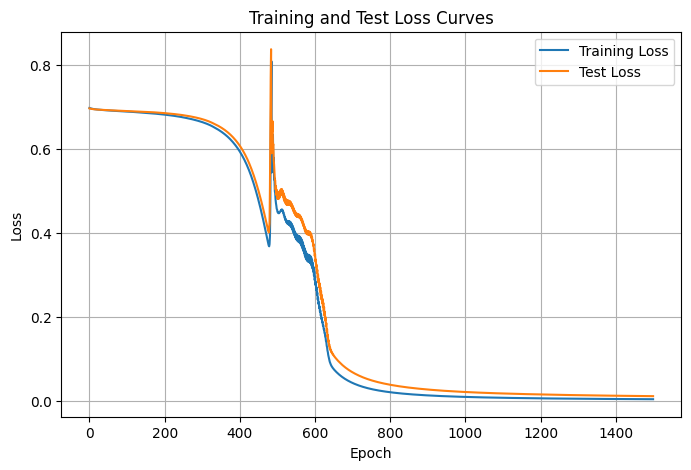

In [32]:
model = ModelV2().to(device) # reset model
epochs = 1500
optimizer = torch.optim.SGD(params=model.parameters(), 
                            lr=0.1)

train_losses, acc_list, test_losses, test_acc = train_and_test_loop(
    model=model,
    epochs=epochs,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    loss_fn=loss_fn,
    optimizer=optimizer
)

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)
plot_loss_curves(train_losses, test_losses)

### Optimizer Comparison: Adam vs SGD

We'll train the same architecture (`ModelV2`) using two different optimizers (SGD and Adam) to see how they affect learning. We'll compare training/test loss curves and decision boundaries for each optimizer.

In [33]:
# train with SGD and record metrics
m_sgd = ModelV2().to(device)
opt_sgd = torch.optim.SGD(m_sgd.parameters(), lr=0.1)
tr_losses_sgd, tr_acc_sgd, te_losses_sgd, te_acc_sgd = train_and_test_loop(
    model=m_sgd,
    epochs=1000,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    loss_fn=nn.BCEWithLogitsLoss(),
    optimizer=opt_sgd
)
print(f"SGD final test acc: {te_acc_sgd[-1]:.2f}%")

Epoch: 0 | Loss: 0.69615, Accuracy: 50.00% | Test loss: 0.69582, Test acc: 50.00%
Epoch: 10 | Loss: 0.69468, Accuracy: 50.00% | Test loss: 0.69452, Test acc: 50.00%
Epoch: 20 | Loss: 0.69367, Accuracy: 50.00% | Test loss: 0.69361, Test acc: 50.00%
Epoch: 30 | Loss: 0.69307, Accuracy: 50.00% | Test loss: 0.69307, Test acc: 50.00%
Epoch: 40 | Loss: 0.69273, Accuracy: 50.00% | Test loss: 0.69277, Test acc: 50.00%
Epoch: 50 | Loss: 0.69248, Accuracy: 50.00% | Test loss: 0.69254, Test acc: 50.00%
Epoch: 60 | Loss: 0.69227, Accuracy: 50.00% | Test loss: 0.69234, Test acc: 50.00%
Epoch: 70 | Loss: 0.69208, Accuracy: 50.00% | Test loss: 0.69216, Test acc: 50.00%
Epoch: 80 | Loss: 0.69190, Accuracy: 50.50% | Test loss: 0.69200, Test acc: 50.00%
Epoch: 90 | Loss: 0.69173, Accuracy: 54.37% | Test loss: 0.69184, Test acc: 54.00%
Epoch: 100 | Loss: 0.69155, Accuracy: 56.75% | Test loss: 0.69168, Test acc: 57.00%
Epoch: 110 | Loss: 0.69137, Accuracy: 63.38% | Test loss: 0.69151, Test acc: 63.00%
Epo

In [34]:

# train with Adam optimizer
m_adam = ModelV2().to(device)
opt_adam = torch.optim.Adam(m_adam.parameters(), lr=0.1)
tr_losses_adam, tr_acc_adam, te_losses_adam, te_acc_adam = train_and_test_loop(
    model=m_adam,
    epochs=1000,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    loss_fn=nn.BCEWithLogitsLoss(),
    optimizer=opt_adam
)
print(f"Adam final test acc: {te_acc_adam[-1]:.2f}%")

Epoch: 0 | Loss: 0.69779, Accuracy: 50.00% | Test loss: 0.94223, Test acc: 50.00%
Epoch: 10 | Loss: 0.68689, Accuracy: 57.00% | Test loss: 0.68008, Test acc: 54.00%
Epoch: 20 | Loss: 0.44838, Accuracy: 70.88% | Test loss: 0.40923, Test acc: 94.50%
Epoch: 30 | Loss: 0.14387, Accuracy: 99.25% | Test loss: 0.15797, Test acc: 99.00%
Epoch: 40 | Loss: 0.05702, Accuracy: 100.00% | Test loss: 0.06856, Test acc: 99.50%
Epoch: 50 | Loss: 0.03010, Accuracy: 100.00% | Test loss: 0.04079, Test acc: 99.50%
Epoch: 60 | Loss: 0.01944, Accuracy: 100.00% | Test loss: 0.02918, Test acc: 99.50%
Epoch: 70 | Loss: 0.01428, Accuracy: 100.00% | Test loss: 0.02341, Test acc: 99.50%
Epoch: 80 | Loss: 0.01141, Accuracy: 100.00% | Test loss: 0.01581, Test acc: 99.50%
Epoch: 90 | Loss: 0.00954, Accuracy: 100.00% | Test loss: 0.01346, Test acc: 100.00%
Epoch: 100 | Loss: 0.00822, Accuracy: 100.00% | Test loss: 0.01256, Test acc: 99.50%
Epoch: 110 | Loss: 0.00721, Accuracy: 100.00% | Test loss: 0.01123, Test acc: 1

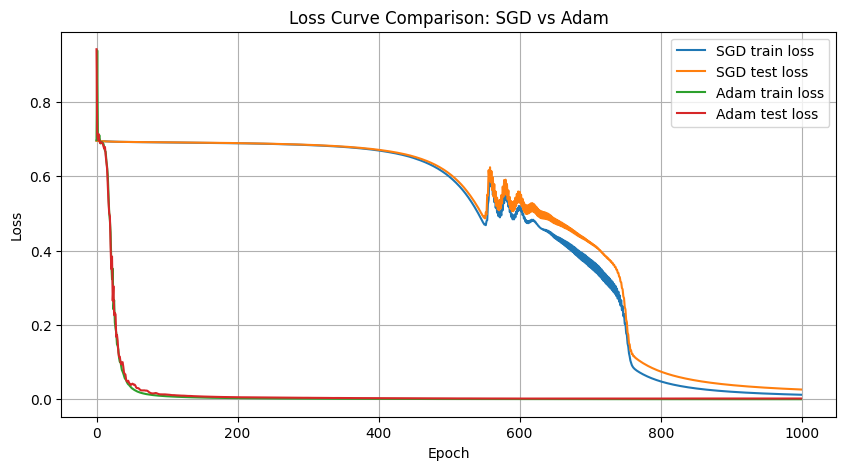

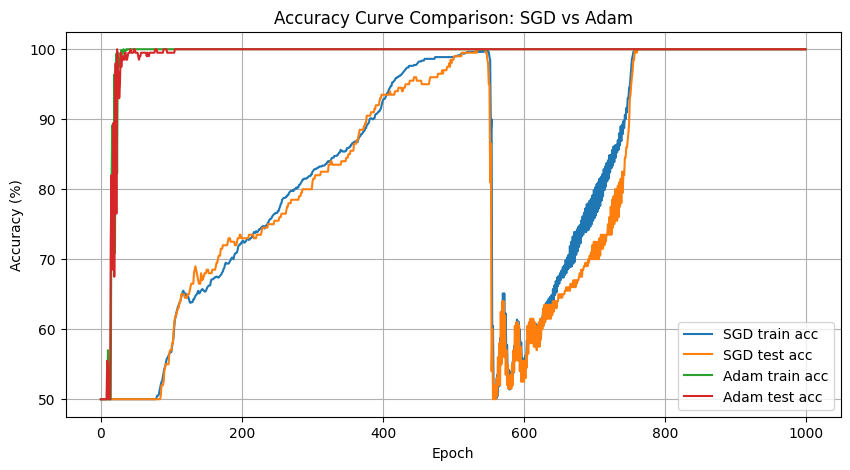

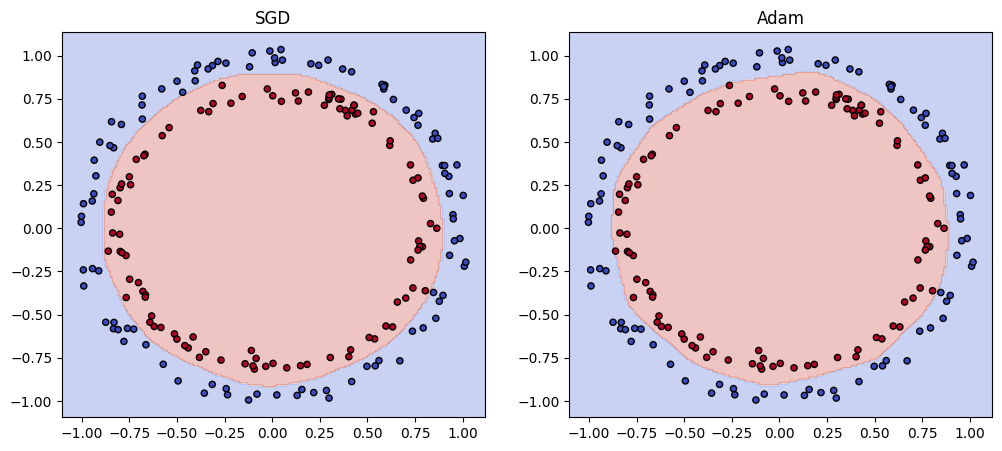

In [35]:
# comparison plots using stored SGD/Adam results
plt.figure(figsize=(10,5))
# loss curves
epochs = range(len(tr_losses_sgd))
plt.plot(epochs, tr_losses_sgd, label="SGD train loss")
plt.plot(epochs, te_losses_sgd, label="SGD test loss")
plt.plot(epochs, tr_losses_adam, label="Adam train loss")
plt.plot(epochs, te_losses_adam, label="Adam test loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve Comparison: SGD vs Adam")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
# accuracy curves
plt.plot(epochs, tr_acc_sgd, label="SGD train acc")
plt.plot(epochs, te_acc_sgd, label="SGD test acc")
plt.plot(epochs, tr_acc_adam, label="Adam train acc")
plt.plot(epochs, te_acc_adam, label="Adam test acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Curve Comparison: SGD vs Adam")
plt.legend()
plt.grid(True)
plt.show()

# decision boundaries
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("SGD")
plot_decision_boundary(m_sgd, X_test, y_test)
plt.subplot(1,2,2)
plt.title("Adam")
plot_decision_boundary(m_adam, X_test, y_test)
plt.show()

## Discussion and Conclusion

In this lab we built several neural network architectures to tackle a binary classification problem on a synthetic circles dataset. Initially **Model 0** contained two linear layers with no activation functions. It was severely underfitting: the decision boundaries were almost straight lines and both training and test accuracy remained low (~50–60%). Adding depth and width in **Model 1** improved capacity and accuracy, but without non-linearities the model still struggled to learn the circular decision boundary.

Introducing ReLU activations in **Model 2** made a dramatic difference. Even with a modest number of parameters the network learned non-linear patterns, producing curved decision regions that matched the data much more closely. Training for longer epochs (1000–1500) stabilized the loss and pushed test accuracy well above 90 %. The loss curves confirmed faster convergence and reduced gap between train and test losses, indicating that the model was no longer underfitting.

### Optimizer Comparison: SGD vs Adam

We trained `ModelV2` using both **SGD** and **Adam** with the same learning rate. Adam consistently reached higher accuracy in fewer epochs due to its adaptive moment estimates, whereas SGD required more epochs to approach similar performance and sometimes exhibited noisier loss curves. The decision boundaries from the Adam-trained model appeared slightly smoother, although both optimizers ultimately produced acceptable classifiers. For simple problems like this, SGD can be adequate—but Adam accelerates training and is generally more forgiving when tuning hyperparameters.

Thus, the model complexity (depth, width, and activations) and appropriate optimization choices are key to transforming an underfitting linear model into a high‑accuracy classifier. Overall, this lab demonstrated how incremental improvements lead to progressively better decision boundaries and how optimizer selection affects training dynamics. 

